In [1]:
cd ..

/home/tommy/Scrivania/Polimi/Honours Programme/SCFR


In [17]:
from games.hanabi import *
from utilities.drawing import draw_tree
from data_structures.cfr_trees import CFRTree, CFRJointStrategy
from cfr_code.reconstruction_cfr import SolveWithReconstructionCFR
from cfr_code.sample_cfr import SolveWithSampleCFR
from cfr_code.cfr import SolveWithCFR
import ast
from utilities.graphs import epsilon_graph, comparative_epsilon_graph

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
tree1 = build_hanabi_tree(num_players = 2, num_colors = 1, color_distribution = [2, 1, 1], 
                          num_cards_per_player = 1, display_progress = False, 
                          utility_splitter = UtilitySplitter.Uniform)
tree2 = build_hanabi_tree(num_players = 2, num_colors = 1, color_distribution = [2, 1, 1],
                          num_cards_per_player = 1, display_progress = False, 
                          utility_splitter = UtilitySplitter.Competitive)

In [31]:
cfr_tree1 = CFRTree(tree1)
res1 = SolveWithReconstructionCFR(cfr_tree1, iterations = 1000, show_perc = True, reconstructEveryIteration = 1,
                                 reconstructWithOptimalPlan = False, checkEveryIteration = 1)

10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%


In [32]:
cfr_tree2 = CFRTree(tree1)
res2 = SolveWithCFR(cfr_tree2, iterations = 1000, show_perc = True, checkEveryIteration = 1)

10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%


In [33]:
cfr_tree3 = CFRTree(tree2)
res3 = SolveWithReconstructionCFR(cfr_tree3, iterations = 1000, show_perc = True, reconstructEveryIteration = 1,
                                 reconstructWithOptimalPlan = False, checkEveryIteration = 1)

10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%


In [34]:
cfr_tree4 = CFRTree(tree2)
res4 = SolveWithCFR(cfr_tree4, iterations = 1000, show_perc = True, checkEveryIteration = 1)

10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%


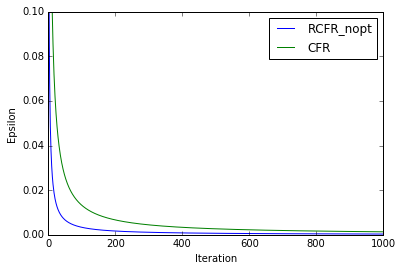

In [39]:
comparative_epsilon_graph([res1, res2], legend = ['RCFR_nopt', 'CFR'], ylims = (0, 0.1))

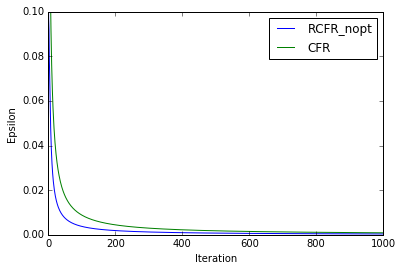

In [40]:
comparative_epsilon_graph([res3, res4], legend = ['RCFR_nopt', 'CFR'], ylims = (0, 0.1))

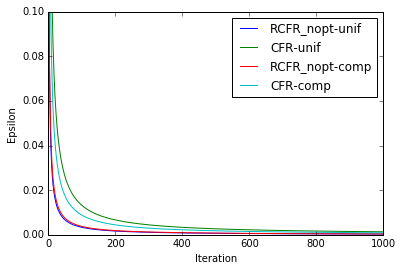

In [43]:
comparative_epsilon_graph([res1, res2, res3, res4], 
                          legend = ['RCFR_nopt-unif', 'CFR-unif', 'RCFR_nopt-comp', 'CFR-comp'],
                          ylims = (0, 0.1))

In [74]:
plan_lengths_1 = list(map(lambda p: len(p), res1['joint'].plans.keys()))
plan_lengths_2 = list(map(lambda p: len(p), res2['joint'].plans.keys()))

In [75]:
len(res1['joint'].plans), len(res2['joint'].plans)

(400, 390)

In [76]:
sum(plan_lengths_1), sum(plan_lengths_2)

(12664000, 1869146)

In [61]:
len(list(res2['joint'].plans.items())[1][0])

3576

In [63]:
len(list(res1['joint'].plans.items())[7][0])

827

In [43]:
ap1 = CFRJointStrategy.stringToActionPlan(list(res1['joint'].plans.items())[7][0])
ap1

{1: 1,
 2: 1,
 9: 1,
 10: 2,
 11: 0,
 13: 0,
 14: 1,
 16: 0,
 17: 1,
 18: 1,
 22: 1,
 23: 0,
 25: 1,
 26: 1,
 27: 0,
 29: 1,
 31: 1,
 32: 0,
 34: 0,
 36: 1,
 37: 0,
 38: 1}

In [52]:
ap2 = CFRJointStrategy.stringToActionPlan(list(res2['joint'].plans.items())[1][0])
CFRJointStrategy.reduceActionPlan(ap2, cfr_tree2)

{1: 1,
 2: 1,
 9: 1,
 10: 2,
 11: 0,
 13: 0,
 14: 1,
 16: 1,
 17: 1,
 18: 1,
 22: 1,
 23: 0,
 25: 1,
 26: 1,
 27: 0,
 29: 1,
 31: 1,
 32: 0,
 34: 0,
 36: 1,
 37: 0,
 38: 1}

In [4]:
tree = build_hanabi_tree(num_players = 2, num_colors = 1, color_distribution = [2, 2, 1], num_cards_per_player = 1,
                        display_progress = False)

In [5]:
cfr_tree1 = CFRTree(tree)
res1 = SolveWithSampleCFR(cfr_tree1, iterations = 1000, show_perc = True, checkEveryIteration = 1)

10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%


In [6]:
cfr_tree2 = CFRTree(tree)
res2 = SolveWithReconstructionCFR(cfr_tree2, iterations = 100, show_perc = True, reconstructEveryIteration = 1,
                                 reconstructWithOptimalPlan = False, checkEveryIteration = 1)

10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%


In [7]:
from utilities.graphs import epsilon_graph

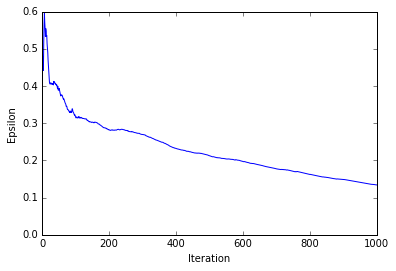

In [8]:
epsilon_graph(res1)

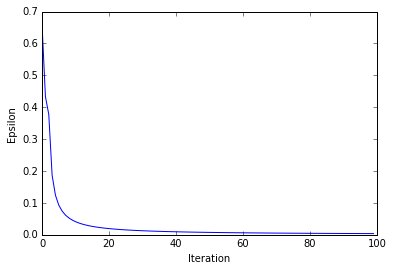

In [9]:
epsilon_graph(res2)

---

In [ ]:
_t = build_hanabi_tree(2, 2, [2, 1], 1, display_progress = True)

In [ ]:
CFRTree(_t)

In [ ]:
(_t.node_count, _t.infoset_count, _t.max_depth)

In [ ]:
def get_action_names(node, actions):
    if len(actions) == 0:
        return [ node.incoming_action_name ]
    return [ node.incoming_action_name ] + get_action_names(node.children[actions[0]], actions[1:])

In [ ]:
def find_node_by_id(node, node_id, actions):    
    if node.id == node_id:
        return (node, actions)
    
    for i in range(0, len(node.children)- 1):
        if node.children[i].id <= node_id and node.children[i+1].id > node_id:
            return find_node_by_id(node.children[i], node_id, actions + [i])
        
    if len(node.children) == 0:
        print(node)
        
    return find_node_by_id(node.children[len(node.children)- 1], node_id, actions + [len(node.children)- 1])

In [ ]:
def buildHanabiState(baseState, actions, print_intermediate_states = False):
    if print_intermediate_states:
        baseState.print()
    
    if len(actions) == 0:
        return baseState
    return buildHanabiState(baseState.getChildState(actions[0]), actions[1:], print_intermediate_states)

In [ ]:
(n1, a1) = find_node_by_id(_t.root, 4629, [])
(n2, a2) = find_node_by_id(_t.root, 625614, [])

(n3, a3) = find_node_by_id(_t.root, 4512, [])
(n4, a4) = find_node_by_id(_t.root, 625529, [])

In [ ]:
an1 = get_action_names(_t.root.children[a1[0]], a1[1:])
an2 = get_action_names(_t.root.children[a2[0]], a2[1:])

an3 = get_action_names(_t.root.children[a3[0]], a3[1:])
an4 = get_action_names(_t.root.children[a4[0]], a4[1:])

In [ ]:
s1 = buildHanabiState(HanabiState.createBaseState(ast.literal_eval(an1[0]), 2, 1, 2, 1), an1[1:])
s2 = buildHanabiState(HanabiState.createBaseState(ast.literal_eval(an2[0]), 2, 1, 2, 1), an2[1:])

s3 = buildHanabiState(HanabiState.createBaseState(ast.literal_eval(an3[0]), 2, 1, 2, 1), an3[1:])
s4 = buildHanabiState(HanabiState.createBaseState(ast.literal_eval(an4[0]), 2, 1, 2, 1), an4[1:])

In [ ]:
s1.print()
print("\n")
s2.print()
print("\n")
s3.print()
print("\n")
s4.print()

In [ ]:
an3[1:4]

In [ ]:
buildHanabiState(HanabiState.createBaseState(ast.literal_eval(an3[0]), 2, 1, 2, 1), an3[1:4]).print()

In [ ]:
(n1.parent.incoming_action, n1.parent.incoming_action_name)

In [ ]:
(n2.parent.incoming_action, n2.parent.incoming_action_name)

In [ ]:
(n1.parent.parent, n1.parent.parent.actionNames)

In [ ]:
(n2.parent.parent, n2.parent.parent.actionNames)

In [ ]:
an1

In [ ]:
an2

In [ ]:
n1.getSequence(1)

In [ ]:
n2.getSequence(1)

In [ ]:
_t.root.children[0].children[0].children[3].children[0].children[0].children[2]

In [ ]:
_t.root.children[0].children[0].children[3].children[0].children[0].children[2].children

In [ ]:
(en1, ea1) = find_node_by_id(_t.root, 4572, [])
(en2, ea2) = find_node_by_id(_t.root, 4589, [])

In [ ]:
ean1 = get_action_names(_t.root.children[ea1[0]], ea1[1:])
ean2 = get_action_names(_t.root.children[ea2[0]], ea2[1:])

In [ ]:
es1 = buildHanabiState(HanabiState.createBaseState(ast.literal_eval(ean1[0]), 2, 1, 2, 1), ean1[1:])
es2 = buildHanabiState(HanabiState.createBaseState(ast.literal_eval(ean2[0]), 2, 1, 2, 1), ean2[1:])

In [ ]:
ea1

In [ ]:
ean1

In [ ]:
ean2

In [ ]:
es1.print()

In [ ]:
es2.print()

In [ ]:
es1.toPlayerState(1) == es2.toPlayerState(1)

In [ ]:
s1.toPlayerState(1) == s2.toPlayerState(1)